# Predicting Tomorrow's Gold Price Direction


#### Github Repository Link
https://github.com/AndreeTSendjaja/Predicting-Tomorrow-s-Gold-Price-Direction


Given several other financial instruments as predictors and past gold price direction, classified as up or down relative to previous day's price, as the response variable, as the title goes, this project attempts to predict tomorrow's gold price direction using machine learning supervised classification models such as: logistic regression, KNN, decision tree, random forest and support vector machine SVM. <br>

It is the author's hope that the success of building such a model, when accurate, however ambitious, would bring both academic satisfactions and tangible material accomplishments. <br>

Please note that the author does not have domain expertise in building the model, following predictions churned by this project is not recommended. 

### Data


#### General Description
The author does not pull out a ready dataset from the internet, but collate several ones that are deemed relevant. 
Sources include: investing.com and generalblue.com. A comprehensive list of sources is provided at the end of this report. 

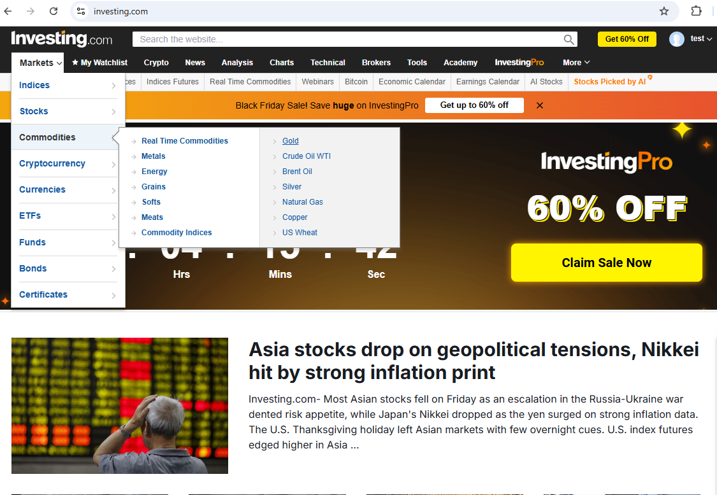
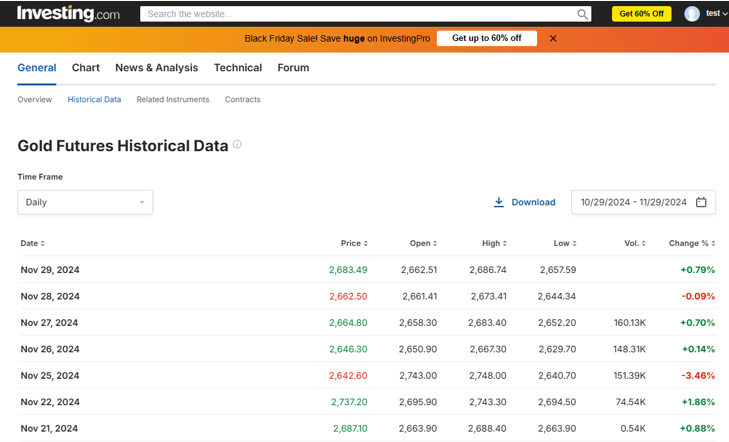



Other instruments used to build predictors include: <br>
Brent Oil Futures, Natural Gas, Dow Jones, Nasdaq 100, Nikkei 225, S&P 500, EUR/USD ratio, GBP/USD ratio, USD/JPY ratio, US Holidays. <br>
These instruments, except US Holidays that is downloaded from generalblue.com, are downloaded also from investing.com.

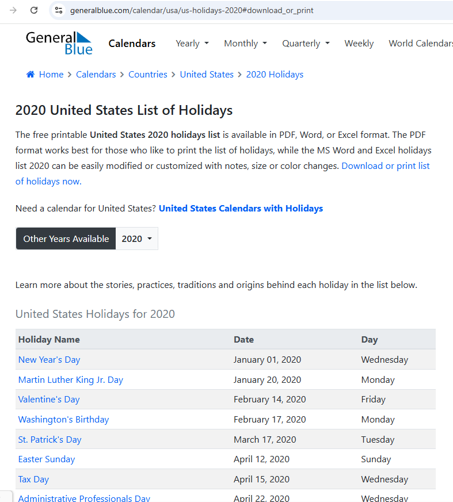

Again, the author does not have domain expertise and hence is using financial instruments that only sound familiar & relevant.
In his thinking, financial instruments moves in opposite directions to each other, that is when a financial instrument would seemingly generate low returns in the future, people would move money away from it to other instruments - driving the price of the first instrument lower and the latter higher. In theory, if we cover movements of enough instruments, we could pinpoint gold price movements or at least its directions. 

The author keeps reminding himself that his personal goal in the project is to get a feel of building machine learning models, and not necessarily ones that he could use to trade tomorrow. 

Quillbot.com is used as citations generator.

#### Preprocessing

This is how a rather raw data for a commodity from investing.com looks like:
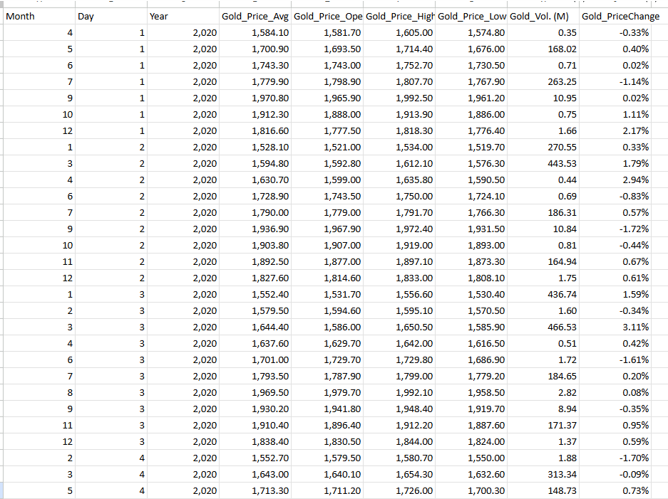 <br>

This is how US holidays look like when downloaded from generalblue.com:
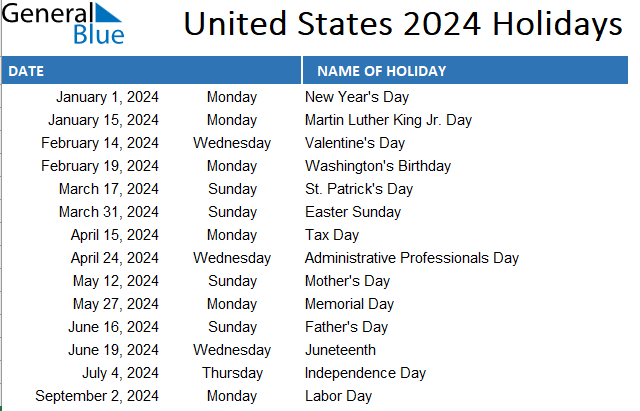 <br>

The author collate all raw datasets in Google Sheet, and turn them to the following. The author feels that daily opening, high, and low prices are represented as daily price averages, and hence not included in the master dataset.
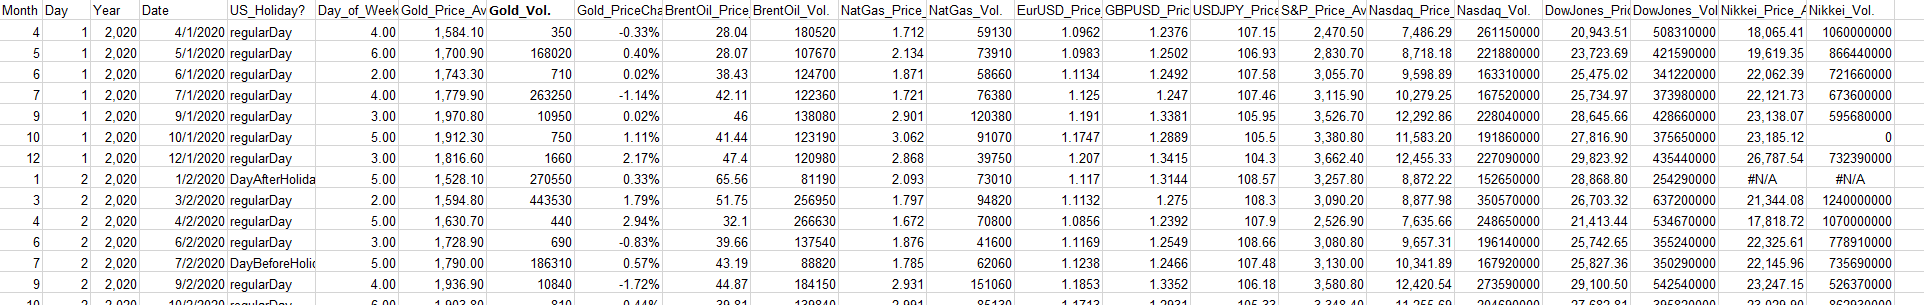 <br>

That master raw data is then uploaded to Jupyter Notebook to be further pre-processed



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.neighbors import BallTree
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import random
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, classification_report

gold_df = pd.read_excel('gold_currencies_indices_v2.xlsx')


In [2]:
gold_df

,Month,Day,Year,Date,US_Holiday?,Day_of_Week,Gold_Price_Avg,Gold_Vol.,Gold_PriceChange,BrentOil_Price_Avg,...,EurUSD_Price_Avg,GBPUSD_Price_Avg,USDJPY_Price_Avg,S&P_Price_Avg,Nasdaq_Price_Avg,Nasdaq_Vol.,DowJones_Price_Avg,DowJones_Vol.,Nikkei_Price_Avg,Nikkei_Vol.
0,4,1,2020,2020-04-01,regularDay,4,1584.1,350.0,-0.0033,28.04,...,1.0962,1.2376,107.15,2470.5,7486.29,261150000.0,20943.51,508310000.0,18065.41,1.060000e+09
1,5,1,2020,2020-05-01,regularDay,6,1700.9,168020.0,0.0040,28.07,...,1.0983,1.2502,106.93,2830.7,8718.18,221880000.0,23723.69,421590000.0,19619.35,8.664400e+08
2,6,1,2020,2020-06-01,regularDay,2,1743.3,710.0,0.0002,38.43,...,1.1134,1.2492,107.58,3055.7,9598.89,163310000.0,25475.02,341220000.0,22062.39,7.216600e+08
3,7,1,2020,2020-07-01,regularDay,4,1779.9,263250.0,-0.0114,42.11,...,1.1250,1.2470,107.46,3115.9,10279.25,167520000.0,25734.97,373980000.0,22121.73,6.736000e+08
4,9,1,2020,2020-09-01,regularDay,3,1970.8,10950.0,0.0002,46.00,...,1.1910,1.3381,105.95,3526.7,12292.86,228040000.0,28645.66,428660000.0,23138.07,5.956800e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1258,12,30,2020,2020-12-30,DayBeforeHoliday,4,1893.4,133660.0,0.0069,51.63,...,1.2295,1.3622,103.17,3732.0,12845.36,136770000.0,30409.56,296140000.0,27444.17,5.058700e+08
1259,12,30,2021,2021-12-30,regularDay,5,1814.1,113430.0,0.0052,79.53,...,1.1323,1.3494,115.06,4778.7,16429.10,125580000.0,36398.08,207640000.0,28791.71,4.038900e+08
1260,12,30,2022,2022-12-30,DayBeforeHoliday,6,1826.2,107500.0,0.0001,85.65,...,1.0702,1.2097,131.11,3839.5,10939.76,224600000.0,33147.25,296190000.0,26094.50,5.273600e+08
1261,12,31,2020,2020-12-31,Holiday,5,1895.1,130630.0,0.0009,51.82,...,1.2213,1.3673,103.24,3756.1,12888.28,158540000.0,30606.48,287060000.0,NaN,NaN


In [3]:
gold_df.describe()

,Month,Day,Year,Day_of_Week,Gold_Price_Avg,Gold_Vol.,Gold_PriceChange,BrentOil_Price_Avg,BrentOil_Vol.,NatGas_Price_Avg,...,EurUSD_Price_Avg,GBPUSD_Price_Avg,USDJPY_Price_Avg,S&P_Price_Avg,Nasdaq_Price_Avg,Nasdaq_Vol.,DowJones_Price_Avg,DowJones_Vol.,Nikkei_Price_Avg,Nikkei_Vol.
count,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,...,1263.000000,1263.000000,1263.000000,1231.000000,1232.000000,1.230000e+03,1232.000000,1.231000e+03,1187.000000,1.187000e+03
mean,6.416469,15.708630,2021.954869,3.996041,1927.918052,103800.063341,0.000497,74.489572,240788.677751,3.582975,...,1.109473,1.283906,127.484632,4221.286344,14007.668994,2.448453e+08,33436.709919,3.635721e+08,29385.957658,8.588207e+08
std,3.382501,8.763885,1.399691,1.407187,248.784708,129749.592285,0.010157,19.587763,94457.679050,1.856789,...,0.058188,0.066159,18.257294,730.288011,3056.230843,8.438610e+07,4474.361850,1.049541e+08,5289.331759,3.038963e+08
min,1.000000,1.000000,2020.000000,2.000000,1477.900000,0.000000,-0.049900,22.740000,0.000000,1.544000,...,0.959200,1.068400,102.340000,2237.400000,6994.290000,7.267000e+07,18591.930000,1.170400e+08,16552.830000,0.000000e+00
25%,3.000000,8.000000,2021.000000,3.000000,1777.800000,825.000000,-0.004400,64.855000,174755.000000,2.374500,...,1.074000,1.241300,109.295000,3807.050000,11850.317500,1.923050e+08,30995.615000,2.985700e+08,26644.050000,6.481050e+08
50%,6.000000,16.000000,2022.000000,4.000000,1868.000000,5390.000000,0.000500,78.140000,225280.000000,2.844000,...,1.094700,1.274700,130.130000,4192.630000,13727.400000,2.333950e+08,33871.755000,3.411300e+08,28333.520000,7.868000e+08
75%,9.000000,23.000000,2023.000000,5.000000,1984.100000,205835.000000,0.006000,85.420000,291845.000000,4.074000,...,1.160200,1.332250,144.750000,4567.320000,15766.962500,2.743775e+08,35476.090000,3.959150e+08,32482.085000,1.010000e+09
max,12.000000,31.000000,2024.000000,6.000000,2800.800000,813410.000000,0.059500,123.480000,703390.000000,9.647000,...,1.232500,1.420900,161.680000,6001.350000,21117.180000,9.836900e+08,44293.130000,9.226800e+08,42224.020000,2.860000e+09



#### Data Cleaning & Exploratory Data Analysis

First thing's first, the raw master dataset does not include next days' gold price change direction; the author needs to create that.

In [4]:
gold_df = gold_df.sort_values(by = "Date")

# Turning d+1 daily gold price percentage change to daily gold price change direction 
gold_df["Gold_PriceChange_D+1"] = gold_df["Gold_PriceChange"].shift(-1)
## https://www.geeksforgeeks.org/create-a-new-column-in-pandas-dataframe-based-on-the-existing-columns/
gold_df['Gold_Price_D+1_Direction'] = np.where(gold_df['Gold_PriceChange_D+1'] > 0, 1, 0)

The next low hanging fruit in preprocessing seems to be converting day-of-week & holidays into dummy variables.

In [5]:
def dow(value):
    if value == 1:
        return "Sun"
    elif value == 2:
        return "Mon"
    elif value == 3:
        return "Tue"
    elif value == 4:
        return "Wed"
    elif value == 5:
        return "Thu"
    elif value == 6:
        return "Fri"
    elif value == 7:
        return "Sat"
    
gold_df['dow_spelled'] = gold_df['Day_of_Week'].map(dow)   

# Turning categorical data, day of week and holiday, into dummies
## https://www.geeksforgeeks.org/how-to-convert-categorical-data-to-binary-data-in-python/
holiday_df = pd.get_dummies(gold_df['US_Holiday?'])
dow_df = pd.get_dummies(gold_df['dow_spelled'])

The author suspects tomorrow's price is not only related to today's price & volume, but also the past several days. Here I create columns of shifted past days data to be included in building the model.

In [6]:
# https://www.statology.org/pandas-lag/#:~:text=You%20can%20use%20the%20shift,lagged%20values%20of%20another%20column.&text=Note%20that%20the%20value%20in,to%20calculate%20the%20lag%20for.

gold_df["Gold_Price_Avg_D-1"] = gold_df["Gold_Price_Avg"].shift(1)
gold_df["Gold_Price_Avg_D-2"] = gold_df["Gold_Price_Avg"].shift(2)
gold_df["Gold_Price_Avg_D-3"] = gold_df["Gold_Price_Avg"].shift(3)
gold_df["Gold_Price_Avg_D-4"] = gold_df["Gold_Price_Avg"].shift(4)
gold_df["Gold_Price_Avg_D-5"] = gold_df["Gold_Price_Avg"].shift(5)

gold_df["Gold_Vol._D-1"] = gold_df["Gold_Vol."].shift(1)
gold_df["Gold_Vol._D-2"] = gold_df["Gold_Vol."].shift(2)
gold_df["Gold_Vol._D-3"] = gold_df["Gold_Vol."].shift(3)
gold_df["Gold_Vol._D-4"] = gold_df["Gold_Vol."].shift(4)
gold_df["Gold_Vol._D-5"] = gold_df["Gold_Vol."].shift(5)

gold_df["BrentOil_Price_Avg_D-1"] = gold_df["BrentOil_Price_Avg"].shift(1)
gold_df["BrentOil_Price_Avg_D-2"] = gold_df["BrentOil_Price_Avg"].shift(2)
gold_df["BrentOil_Price_Avg_D-3"] = gold_df["BrentOil_Price_Avg"].shift(3)
gold_df["BrentOil_Price_Avg_D-4"] = gold_df["BrentOil_Price_Avg"].shift(4)
gold_df["BrentOil_Price_Avg_D-5"] = gold_df["BrentOil_Price_Avg"].shift(5)

gold_df["BrentOil_Vol._D-1"] = gold_df["BrentOil_Vol."].shift(1)
gold_df["BrentOil_Vol._D-2"] = gold_df["BrentOil_Vol."].shift(2)
gold_df["BrentOil_Vol._D-3"] = gold_df["BrentOil_Vol."].shift(3)
gold_df["BrentOil_Vol._D-4"] = gold_df["BrentOil_Vol."].shift(4)
gold_df["BrentOil_Vol._D-5"] = gold_df["BrentOil_Vol."].shift(5)

gold_df["NatGas_Price_Avg_D-1"] = gold_df["NatGas_Price_Avg"].shift(1)
gold_df["NatGas_Price_Avg_D-2"] = gold_df["NatGas_Price_Avg"].shift(2)
gold_df["NatGas_Price_Avg_D-3"] = gold_df["NatGas_Price_Avg"].shift(3)
gold_df["NatGas_Price_Avg_D-4"] = gold_df["NatGas_Price_Avg"].shift(4)
gold_df["NatGas_Price_Avg_D-5"] = gold_df["NatGas_Price_Avg"].shift(5)

gold_df["NatGas_Vol._D-1"] = gold_df["NatGas_Vol."].shift(1)
gold_df["NatGas_Vol._D-2"] = gold_df["NatGas_Vol."].shift(2)
gold_df["NatGas_Vol._D-3"] = gold_df["NatGas_Vol."].shift(3)
gold_df["NatGas_Vol._D-4"] = gold_df["NatGas_Vol."].shift(4)
gold_df["NatGas_Vol._D-5"] = gold_df["NatGas_Vol."].shift(5)

gold_df["EurUSD_Price_Avg_D-1"] = gold_df["EurUSD_Price_Avg"].shift(1)
gold_df["EurUSD_Price_Avg_D-2"] = gold_df["EurUSD_Price_Avg"].shift(2)
gold_df["EurUSD_Price_Avg_D-3"] = gold_df["EurUSD_Price_Avg"].shift(3)
gold_df["EurUSD_Price_Avg_D-4"] = gold_df["EurUSD_Price_Avg"].shift(4)
gold_df["EurUSD_Price_Avg_D-5"] = gold_df["EurUSD_Price_Avg"].shift(5)

gold_df["GBPUSD_Price_Avg_D-1"] = gold_df["GBPUSD_Price_Avg"].shift(1)
gold_df["GBPUSD_Price_Avg_D-2"] = gold_df["GBPUSD_Price_Avg"].shift(2)
gold_df["GBPUSD_Price_Avg_D-3"] = gold_df["GBPUSD_Price_Avg"].shift(3)
gold_df["GBPUSD_Price_Avg_D-4"] = gold_df["GBPUSD_Price_Avg"].shift(4)
gold_df["GBPUSD_Price_Avg_D-5"] = gold_df["GBPUSD_Price_Avg"].shift(5)

gold_df["USDJPY_Price_Avg_D-1"] = gold_df["USDJPY_Price_Avg"].shift(1)
gold_df["USDJPY_Price_Avg_D-2"] = gold_df["USDJPY_Price_Avg"].shift(2)
gold_df["USDJPY_Price_Avg_D-3"] = gold_df["USDJPY_Price_Avg"].shift(3)
gold_df["USDJPY_Price_Avg_D-4"] = gold_df["USDJPY_Price_Avg"].shift(4)
gold_df["USDJPY_Price_Avg_D-5"] = gold_df["USDJPY_Price_Avg"].shift(5)

gold_df["S&P_Price_Avg_D-1"] = gold_df["S&P_Price_Avg"].shift(1)
gold_df["S&P_Price_Avg_D-2"] = gold_df["S&P_Price_Avg"].shift(2)
gold_df["S&P_Price_Avg_D-3"] = gold_df["S&P_Price_Avg"].shift(3)
gold_df["S&P_Price_Avg_D-4"] = gold_df["S&P_Price_Avg"].shift(4)
gold_df["S&P_Price_Avg_D-5"] = gold_df["S&P_Price_Avg"].shift(5)

gold_df["Nasdaq_Price_Avg_D-1"] = gold_df["Nasdaq_Price_Avg"].shift(1)
gold_df["Nasdaq_Price_Avg_D-2"] = gold_df["Nasdaq_Price_Avg"].shift(2)
gold_df["Nasdaq_Price_Avg_D-3"] = gold_df["Nasdaq_Price_Avg"].shift(3)
gold_df["Nasdaq_Price_Avg_D-4"] = gold_df["Nasdaq_Price_Avg"].shift(4)
gold_df["Nasdaq_Price_Avg_D-5"] = gold_df["Nasdaq_Price_Avg"].shift(5)

gold_df["Nasdaq_Vol._D-1"] = gold_df["Nasdaq_Vol."].shift(1)
gold_df["Nasdaq_Vol._D-2"] = gold_df["Nasdaq_Vol."].shift(2)
gold_df["Nasdaq_Vol._D-3"] = gold_df["Nasdaq_Vol."].shift(3)
gold_df["Nasdaq_Vol._D-4"] = gold_df["Nasdaq_Vol."].shift(4)
gold_df["Nasdaq_Vol._D-5"] = gold_df["Nasdaq_Vol."].shift(5)

gold_df["DowJones_Price_Avg_D-1"] = gold_df["DowJones_Price_Avg"].shift(1)
gold_df["DowJones_Price_Avg_D-2"] = gold_df["DowJones_Price_Avg"].shift(2)
gold_df["DowJones_Price_Avg_D-3"] = gold_df["DowJones_Price_Avg"].shift(3)
gold_df["DowJones_Price_Avg_D-4"] = gold_df["DowJones_Price_Avg"].shift(4)
gold_df["DowJones_Price_Avg_D-5"] = gold_df["DowJones_Price_Avg"].shift(5)

gold_df["DowJones_Vol._D-1"] = gold_df["DowJones_Vol."].shift(1)
gold_df["DowJones_Vol._D-2"] = gold_df["DowJones_Vol."].shift(2)
gold_df["DowJones_Vol._D-3"] = gold_df["DowJones_Vol."].shift(3)
gold_df["DowJones_Vol._D-4"] = gold_df["DowJones_Vol."].shift(4)
gold_df["DowJones_Vol._D-5"] = gold_df["DowJones_Vol."].shift(5)

gold_df["Nikkei_Price_Avg_D-1"] = gold_df["Nikkei_Price_Avg"].shift(1)
gold_df["Nikkei_Price_Avg_D-2"] = gold_df["Nikkei_Price_Avg"].shift(2)
gold_df["Nikkei_Price_Avg_D-3"] = gold_df["Nikkei_Price_Avg"].shift(3)
gold_df["Nikkei_Price_Avg_D-4"] = gold_df["Nikkei_Price_Avg"].shift(4)
gold_df["Nikkei_Price_Avg_D-5"] = gold_df["Nikkei_Price_Avg"].shift(5)

gold_df["Nikkei_Vol._D-1"] = gold_df["Nikkei_Vol."].shift(1)
gold_df["Nikkei_Vol._D-2"] = gold_df["Nikkei_Vol."].shift(2)
gold_df["Nikkei_Vol._D-3"] = gold_df["Nikkei_Vol."].shift(3)
gold_df["Nikkei_Vol._D-4"] = gold_df["Nikkei_Vol."].shift(4)
gold_df["Nikkei_Vol._D-5"] = gold_df["Nikkei_Vol."].shift(5)


Processed_gold_df = pd.concat((gold_df, holiday_df), axis = 1)
Processed_gold_df = pd.concat((Processed_gold_df, dow_df), axis = 1)



Dropping out redundant columns as they have been turned to dummy variables.
Also, dropping out dummy variables to allow sufficient degree of freedoms and avoid multicollinearities.

In [7]:
Processed_gold_df = Processed_gold_df.drop(['Day_of_Week','US_Holiday?','dow_spelled', 'Date',
                                            'Fri', 'regularDay', 'Gold_PriceChange_D+1','Gold_PriceChange' ], axis = 1)



Let's see how the data looks like now:

In [8]:
Processed_gold_df

,Month,Day,Year,Gold_Price_Avg,Gold_Vol.,BrentOil_Price_Avg,BrentOil_Vol.,NatGas_Price_Avg,NatGas_Vol.,EurUSD_Price_Avg,...,Nikkei_Vol._D-3,Nikkei_Vol._D-4,Nikkei_Vol._D-5,DayAfterHoliday,DayBeforeHoliday,Holiday,Mon,Thu,Tue,Wed
7,1,2,2020,1528.1,270550.0,65.56,81190.0,2.093,73010.0,1.1170,...,NaN,NaN,NaN,1,0,0,0,1,0,0
16,1,3,2020,1552.4,436740.0,67.76,202660.0,2.112,61290.0,1.1158,...,NaN,NaN,NaN,0,0,0,0,0,0,0
41,1,6,2020,1568.8,558970.0,68.07,152510.0,2.134,79910.0,1.1193,...,NaN,NaN,NaN,0,0,0,1,0,0,0
50,1,7,2020,1574.3,435870.0,67.57,142790.0,2.153,82700.0,1.1151,...,NaN,NaN,NaN,0,0,0,0,0,1,0
59,1,8,2020,1560.2,813410.0,64.79,270030.0,2.134,170260.0,1.1103,...,NaN,NaN,NaN,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162,11,15,2024,2570.1,179890.0,71.04,307470.0,2.823,181090.0,1.0541,...,1.630000e+09,1.230000e+09,1.590000e+09,0,0,0,0,0,0,0
1174,11,18,2024,2614.6,195290.0,73.30,333850.0,2.973,188340.0,1.0599,...,1.500000e+09,1.630000e+09,1.230000e+09,0,0,0,1,0,0,0
1177,11,19,2024,2631.0,202240.0,73.31,354130.0,2.998,211930.0,1.0595,...,1.340000e+09,1.500000e+09,1.630000e+09,0,0,0,0,0,1,0
1180,11,20,2024,2651.7,182010.0,72.81,260510.0,3.193,225690.0,1.0543,...,1.440000e+09,1.340000e+09,1.500000e+09,0,0,0,0,0,0,1


In [9]:
list(Processed_gold_df.columns)

['Month',
 'Day',
 'Year',
 'Gold_Price_Avg',
 'Gold_Vol.',
 'BrentOil_Price_Avg',
 'BrentOil_Vol.',
 'NatGas_Price_Avg',
 'NatGas_Vol.',
 'EurUSD_Price_Avg',
 'GBPUSD_Price_Avg',
 'USDJPY_Price_Avg',
 'S&P_Price_Avg',
 'Nasdaq_Price_Avg',
 'Nasdaq_Vol.',
 'DowJones_Price_Avg',
 'DowJones_Vol.',
 'Nikkei_Price_Avg',
 'Nikkei_Vol.',
 'Gold_Price_D+1_Direction',
 'Gold_Price_Avg_D-1',
 'Gold_Price_Avg_D-2',
 'Gold_Price_Avg_D-3',
 'Gold_Price_Avg_D-4',
 'Gold_Price_Avg_D-5',
 'Gold_Vol._D-1',
 'Gold_Vol._D-2',
 'Gold_Vol._D-3',
 'Gold_Vol._D-4',
 'Gold_Vol._D-5',
 'BrentOil_Price_Avg_D-1',
 'BrentOil_Price_Avg_D-2',
 'BrentOil_Price_Avg_D-3',
 'BrentOil_Price_Avg_D-4',
 'BrentOil_Price_Avg_D-5',
 'BrentOil_Vol._D-1',
 'BrentOil_Vol._D-2',
 'BrentOil_Vol._D-3',
 'BrentOil_Vol._D-4',
 'BrentOil_Vol._D-5',
 'NatGas_Price_Avg_D-1',
 'NatGas_Price_Avg_D-2',
 'NatGas_Price_Avg_D-3',
 'NatGas_Price_Avg_D-4',
 'NatGas_Price_Avg_D-5',
 'NatGas_Vol._D-1',
 'NatGas_Vol._D-2',
 'NatGas_Vol._D-3',
 '

In [10]:
list(Processed_gold_df.dtypes)

[dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 

In [11]:
Processed_gold_df.describe()

,Month,Day,Year,Gold_Price_Avg,Gold_Vol.,BrentOil_Price_Avg,BrentOil_Vol.,NatGas_Price_Avg,NatGas_Vol.,EurUSD_Price_Avg,...,Nikkei_Vol._D-3,Nikkei_Vol._D-4,Nikkei_Vol._D-5,DayAfterHoliday,DayBeforeHoliday,Holiday,Mon,Thu,Tue,Wed
count,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,...,1.184000e+03,1.183000e+03,1.182000e+03,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000
mean,6.416469,15.708630,2021.954869,1927.918052,103800.063341,74.489572,240788.677751,3.582975,96296.120348,1.109473,...,8.583363e+08,8.581658e+08,8.576736e+08,0.058591,0.030879,0.055424,0.197941,0.202692,0.201900,0.201900
std,3.382501,8.763885,1.399691,248.784708,129749.592285,19.587763,94457.679050,1.856789,48110.451957,0.058188,...,3.041251e+08,3.041971e+08,3.038541e+08,0.234950,0.173058,0.228896,0.398606,0.402164,0.401577,0.401577
min,1.000000,1.000000,2020.000000,1477.900000,0.000000,22.740000,0.000000,1.544000,0.000000,0.959200,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,8.000000,2021.000000,1777.800000,825.000000,64.855000,174755.000000,2.374500,62055.000000,1.074000,...,6.479150e+08,6.477900e+08,6.476650e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,16.000000,2022.000000,1868.000000,5390.000000,78.140000,225280.000000,2.844000,88360.000000,1.094700,...,7.865300e+08,7.864200e+08,7.863400e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,23.000000,2023.000000,1984.100000,205835.000000,85.420000,291845.000000,4.074000,122375.000000,1.160200,...,1.010000e+09,1.010000e+09,1.010000e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12.000000,31.000000,2024.000000,2800.800000,813410.000000,123.480000,703390.000000,9.647000,338970.000000,1.232500,...,2.860000e+09,2.860000e+09,2.860000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
Processed_gold_df.info

<bound method DataFrame.info of       Month  Day  Year  Gold_Price_Avg  Gold_Vol.  BrentOil_Price_Avg  \
7         1    2  2020          1528.1   270550.0               65.56   
16        1    3  2020          1552.4   436740.0               67.76   
41        1    6  2020          1568.8   558970.0               68.07   
50        1    7  2020          1574.3   435870.0               67.57   
59        1    8  2020          1560.2   813410.0               64.79   
...     ...  ...   ...             ...        ...                 ...   
1162     11   15  2024          2570.1   179890.0               71.04   
1174     11   18  2024          2614.6   195290.0               73.30   
1177     11   19  2024          2631.0   202240.0               73.31   
1180     11   20  2024          2651.7   182010.0               72.81   
1183     11   21  2024          2670.7        0.0               73.62   

      BrentOil_Vol.  NatGas_Price_Avg  NatGas_Vol.  EurUSD_Price_Avg  ...  \
7           81

Let's take a peek at correlations:


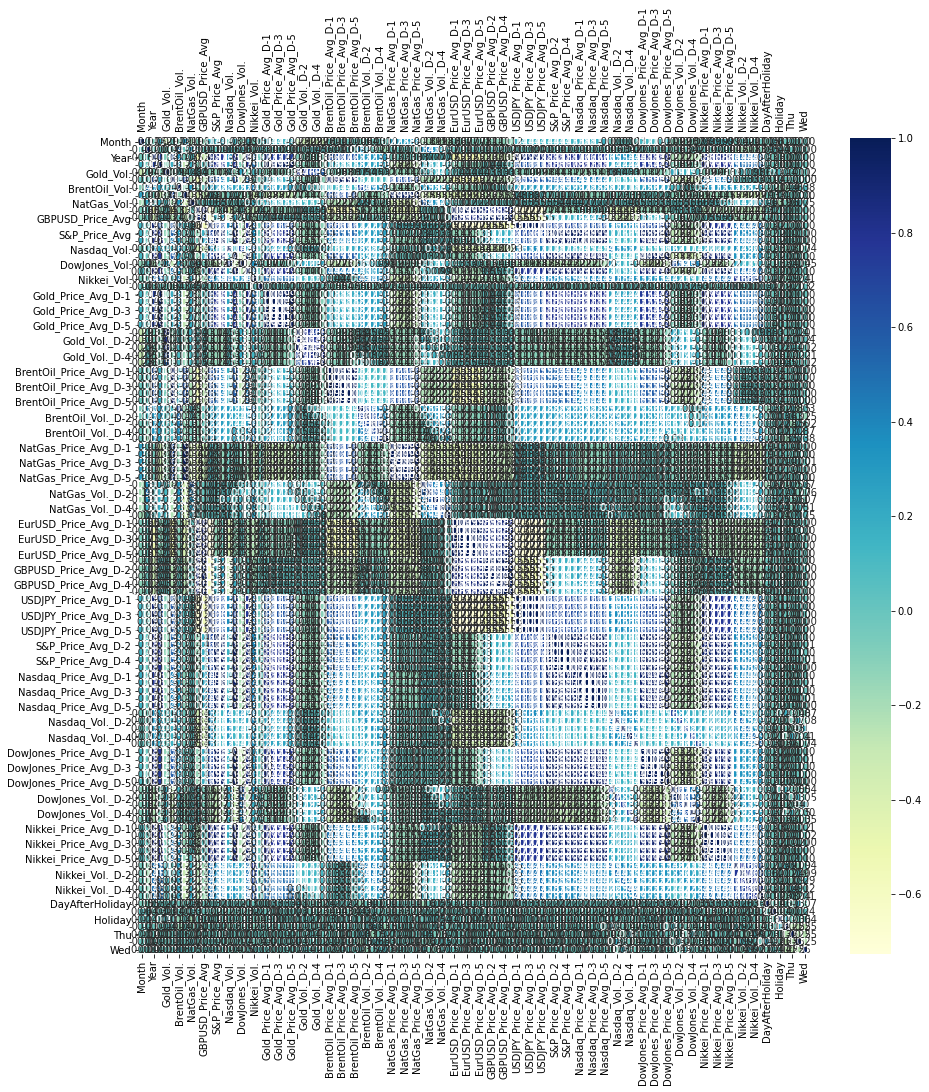

In [13]:
x_df = Processed_gold_df.drop(['Gold_Price_D+1_Direction'], axis = 1)
y_df = Processed_gold_df['Gold_Price_D+1_Direction']

plt.figure(figsize = (15,15))

# https://stackoverflow.com/questions/74054217/how-do-you-put-the-x-axis-labels-on-the-top-of-the-heatmap-created-with-seaborn
# https://stackoverflow.com/questions/63964006/round-decimal-places-seaborn-heatmap-labels
plt.tick_params(labeltop = True)
dataplot = sns.heatmap(Processed_gold_df.corr(), cmap = "YlGnBu", annot = True, linewidths = 0.5, fmt = '.2f')

Woww.. The author has just remembered that there are 106 predictors in the dataset, and it would be hard to contain all of them in a heat map altogether. Not to mention, not all of them may be important. <br> 

But, that's alright. The above heatmap suffices to see that some predictors correlate highly with another and hence can be trimmed out. <br>

But before that, let's find out ones that highly correlate with next days' gold price direction. Afterall, as the TAs kindly help pointed out, "Multicollinearity is a primary concern for regression-based models like Linear and Logistic Regression because it affects the interpretability and stability of the model coefficients. For models like decision trees or boosting methods, multicollinearity is not an issue as these models are non-parametric and don't rely on coefficients for predictions. However, having highly correlated features may lead to redundancy, which can increase model complexity unnecessarily. "

In [14]:
# https://www.geeksforgeeks.org/python-dictionary/

potential_significant_predictors = []
corr_dict = {}

predictors_corr = Processed_gold_df.corr()['Gold_Price_D+1_Direction']

for features_idx in range(0, len(Processed_gold_df.columns )):
    corr_magn = abs(predictors_corr[features_idx])
    corr_dict[features_idx] = corr_magn
 

# https://www.geeksforgeeks.org/how-to-sort-a-dictionary-by-value-in-python/
# https://www.geeksforgeeks.org/python-sorted-function/   

sorted_corr_dict = dict(sorted(corr_dict.items(), key = lambda item: item[1], reverse = True))

for key_idx in range(1, 21):
    potential_significant_predictors.append(Processed_gold_df.columns[list(sorted_corr_dict.keys())[key_idx]])
    
    cur_predictor = Processed_gold_df.columns[list(sorted_corr_dict.keys())[key_idx]]
    cur_magnitude = list(sorted_corr_dict.values())[key_idx]
    print(cur_predictor, " :", cur_magnitude)


Holiday  : 0.09343113114048412
BrentOil_Price_Avg_D-4  : 0.046923571584731934
NatGas_Vol.  : 0.04686017465023451
BrentOil_Price_Avg_D-1  : 0.04614732470332546
DowJones_Vol._D-4  : 0.04592757708562616
BrentOil_Price_Avg_D-5  : 0.04565373059195448
BrentOil_Price_Avg_D-2  : 0.04536080230278412
BrentOil_Price_Avg_D-3  : 0.04398866441766228
NatGas_Price_Avg_D-1  : 0.04381668387406184
BrentOil_Price_Avg  : 0.04221902213518596
NatGas_Price_Avg_D-2  : 0.041802682749530404
NatGas_Price_Avg  : 0.04174057168618509
NatGas_Price_Avg_D-3  : 0.03898571086243888
BrentOil_Vol._D-3  : 0.03799187077581839
NatGas_Price_Avg_D-4  : 0.03797592991211697
NatGas_Price_Avg_D-5  : 0.03509820472177668
DowJones_Vol._D-5  : 0.034932646190208104
Gold_Vol.  : 0.033744617250401
Day  : 0.030074742626925874
BrentOil_Vol.  : 0.030030573224653266


The above is the top 20 predictors that highly correlates with next days' gold price direction. As we can see, none of them has a very high correlation. <br>

Also, looking at the heat map earlier, it is safe to suspect the above list can be further trimmed as they correlate within one another. Thus, let's look at a correlation heatmap generated only for the above 20 predictors. <br>

Oh, the following heatmap has been sorted descendingly on correlations with next days' gold price direction.

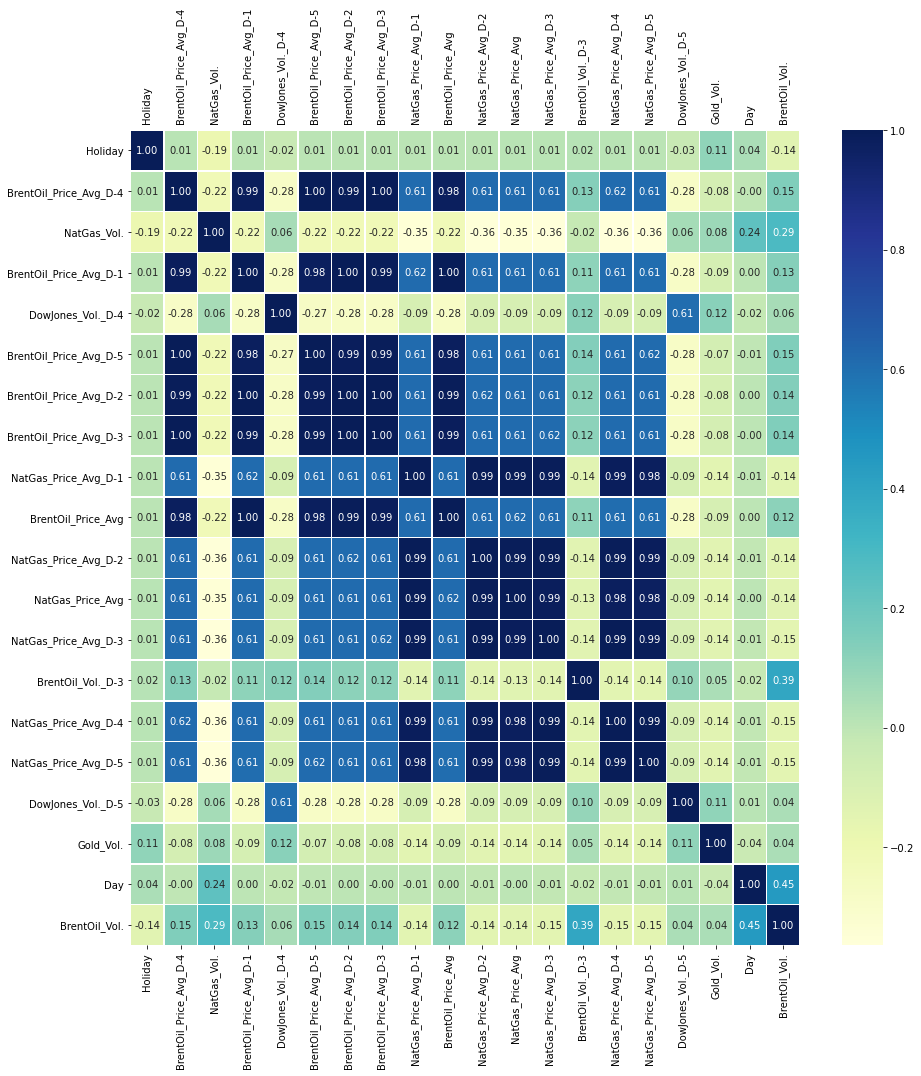

In [15]:
x_signi_df = pd.DataFrame(data = x_df, columns = potential_significant_predictors)


# https://www.stratascratch.com/blog/a-beginner-s-guide-to-collinearity-what-it-is-and-how-it-affects-our-regression-model/
plt.figure(figsize = (15,15))
plt.tick_params(labeltop = True)
dataplot = sns.heatmap(x_signi_df.corr(), cmap = "YlGnBu", annot = True, linewidths = 0.5, fmt = '.2f')

As can be seen, BrentOil_Price_Avg_D-1, BrentOil_Price_Avg_D-2, BrentOil_Price_Avg_D-3, BrentOil_Price_Avg_D-5, BrentOil_Price_Avg, NatGas_Price_Avg_D-1, NatGas_Price_Avg_D-2, NatGas_Price_Avg_D-3, NatGas_Price_Avg_D-4, NatGas_Price_Avg_D-5, NatGas_Price_Avg correlate highly within one-another; there is no need to include every single one of them into the model. <br>

Let's use VIF to further avoid multicollinearity. For starters, let's pick the ones that do not correlate with one another while prioritizing ones that have high correlations with the response variable.


In [16]:
potential_significant_predictors = ['Holiday', 'NatGas_Vol.', 'BrentOil_Price_Avg', 'DowJones_Vol._D-4', 'NatGas_Price_Avg', 'Gold_Vol.', 'Day', 'BrentOil_Vol.']
x_signi_df = pd.DataFrame(data = Processed_gold_df, columns = potential_significant_predictors)

len(x_signi_df) - x_signi_df.describe().loc['count']



Holiday                0.0
NatGas_Vol.            0.0
BrentOil_Price_Avg     0.0
DowJones_Vol._D-4     36.0
NatGas_Price_Avg       0.0
Gold_Vol.              0.0
Day                    0.0
BrentOil_Vol.          0.0
Name: count, dtype: float64

Since out of 1263 rows, there are only 36 rows that has NA values, these rows are dropped; 36 rows is arguably not a lot to lose any sleep on, at the same time, they could cause calculations & models to malfunction.

In [17]:
# https://www.aporia.com/resources/how-to/select-multiple-columns-in-dataframe/

potential_significant_predictors = ['Holiday', 'NatGas_Vol.', 'BrentOil_Price_Avg', 'DowJones_Vol._D-4', 'NatGas_Price_Avg', 'Gold_Vol.', 'Day', 'BrentOil_Vol.']
x_signi_df = pd.DataFrame(data = x_df, columns = potential_significant_predictors)
x_signi_df = x_signi_df.dropna()

vif_data = pd.DataFrame()
vif_data["feature"] = x_signi_df.columns 
vif_data["VIF"] = [variance_inflation_factor(x_signi_df.values, i) for i in range(len(x_signi_df.columns))]

print(vif_data)

              feature        VIF
0             Holiday   1.151311
1         NatGas_Vol.   5.766440
2  BrentOil_Price_Avg  19.458267
3   DowJones_Vol._D-4   8.436561
4    NatGas_Price_Avg   9.121030
5           Gold_Vol.   1.734557
6                 Day   5.587290
7       BrentOil_Vol.  11.407500


As AnalyticsVidhya.com explained, "VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others". Let's take out BrentOil_Vol and see how it goes:

In [18]:
# taking out Brent Oil Vol
potential_significant_predictors = ['Holiday', 'NatGas_Vol.', 'BrentOil_Price_Avg', 'DowJones_Vol._D-4', 'NatGas_Price_Avg', 'Gold_Vol.', 'Day']
x_signi_df = pd.DataFrame(data = x_df, columns = potential_significant_predictors)
x_signi_df = x_signi_df.dropna()

vif_data = pd.DataFrame()
vif_data["feature"] = x_signi_df.columns 
vif_data["VIF"] = [variance_inflation_factor(x_signi_df.values, i) for i in range(len(x_signi_df.columns))]

print(vif_data)

              feature        VIF
0             Holiday   1.121965
1         NatGas_Vol.   5.615108
2  BrentOil_Price_Avg  15.535491
3   DowJones_Vol._D-4   7.974094
4    NatGas_Price_Avg   8.450883
5           Gold_Vol.   1.726774
6                 Day   4.440582


Let's put back Brent Oil Vol and take out Brent Oil Price Avg, then see how it goes:

In [19]:
# taking out Brent Oil Price Avg
potential_significant_predictors = ['Holiday', 'NatGas_Vol.', 'DowJones_Vol._D-4', 'NatGas_Price_Avg', 'Gold_Vol.', 'Day', 'BrentOil_Vol.']
x_signi_df = pd.DataFrame(data = x_df, columns = potential_significant_predictors)
x_signi_df = x_signi_df.dropna()

vif_data = pd.DataFrame()
vif_data["feature"] = x_signi_df.columns 
vif_data["VIF"] = [variance_inflation_factor(x_signi_df.values, i) for i in range(len(x_signi_df.columns))]

print(vif_data)
print("\n")
print(np.average(vif_data['VIF']))

             feature       VIF
0            Holiday  1.127874
1        NatGas_Vol.  5.522673
2  DowJones_Vol._D-4  8.294477
3   NatGas_Price_Avg  3.777801
4          Gold_Vol.  1.730858
5                Day  5.542320
6      BrentOil_Vol.  9.107754


5.014822421537799


Let's take out both Brent Oil Vol & Brent Oil Price Avg:

In [20]:
# taking out Brent Oil Price Avg
# taking out Brent Oil Vol
potential_significant_predictors = ['Holiday', 'NatGas_Vol.', 'DowJones_Vol._D-4', 'NatGas_Price_Avg', 'Gold_Vol.', 'Day']
x_signi_df = pd.DataFrame(data = x_df, columns = potential_significant_predictors)
x_signi_df = x_signi_df.dropna()

vif_data = pd.DataFrame()
vif_data["feature"] = x_signi_df.columns 
vif_data["VIF"] = [variance_inflation_factor(x_signi_df.values, i) for i in range(len(x_signi_df.columns))]

print(vif_data)
print("\n")
print(np.average(vif_data['VIF']))

             feature       VIF
0            Holiday  1.114697
1        NatGas_Vol.  5.055551
2  DowJones_Vol._D-4  7.391046
3   NatGas_Price_Avg  3.717591
4          Gold_Vol.  1.714140
5                Day  4.350121


3.890524252390225


okayy.. much better... Now that we have decided on the features, before we start building models, let's again make sure if there are any NAs.  

In [21]:

potential_significant_predictors = ['Holiday', 'NatGas_Vol.', 'DowJones_Vol._D-4', 'NatGas_Price_Avg', 'Gold_Vol.', 'Day']
x_signi_df = pd.DataFrame(data = Processed_gold_df, columns = potential_significant_predictors)
x_signi_df = x_signi_df.dropna()

len(x_signi_df) - x_signi_df.describe().loc['count']

Holiday              0.0
NatGas_Vol.          0.0
DowJones_Vol._D-4    0.0
NatGas_Price_Avg     0.0
Gold_Vol.            0.0
Day                  0.0
Name: count, dtype: float64

In [22]:
x_signi_df.isna().any()

Holiday              False
NatGas_Vol.          False
DowJones_Vol._D-4    False
NatGas_Price_Avg     False
Gold_Vol.            False
Day                  False
dtype: bool

there is not any NAs on these predictors. let's take another look on the spread of the chosen predictors

In [23]:
x_signi_df.describe()

,Holiday,NatGas_Vol.,DowJones_Vol._D-4,NatGas_Price_Avg,Gold_Vol.,Day
count,1227.000000,1227.000000,1.227000e+03,1227.000000,1227.000000,1227.000000
mean,0.057050,96438.345558,3.628859e+08,3.589889,103369.991850,15.722086
std,0.232032,48154.746677,1.043265e+08,1.860224,128835.371701,8.738835
min,0.000000,0.000000,1.170400e+08,1.544000,0.000000,1.000000
25%,0.000000,62415.000000,2.985000e+08,2.381000,820.000000,8.000000
50%,0.000000,88810.000000,3.408400e+08,2.848000,5230.000000,16.000000
75%,0.000000,122375.000000,3.948600e+08,4.078000,205780.000000,23.000000
max,1.000000,338970.000000,9.226800e+08,9.647000,813410.000000,31.000000



Since magnitudes vary rather widely, to optimize the models we are going to build and to reduce impacts of outliers, it feels safer to standardize them. 

In [24]:
features = Processed_gold_df.columns
imputer = SimpleImputer(strategy = 'median')
Processed_gold_df[features] = pd.DataFrame(imputer.fit_transform(Processed_gold_df[features]), columns = features)

potential_significant_predictors = ['Holiday', 'NatGas_Vol.', 'DowJones_Vol._D-4', 'NatGas_Price_Avg', 'Gold_Vol.', 'Day']
x_signi_df = pd.DataFrame(data = Processed_gold_df, columns = potential_significant_predictors)

object = StandardScaler()
x_signi_df_scale = object.fit_transform(x_signi_df)
y_df = Processed_gold_df['Gold_Price_D+1_Direction']

x_arr = np.asarray(x_signi_df_scale)
y_arr = np.asarray(y_df)

x_train, x_test, y_train, y_test = train_test_split(x_arr, y_arr, random_state = 1, test_size = 0.20, shuffle = True)


Now, let's see if there is any imbalances on the response variable

In [25]:
sum(y_df)/len(y_df)

0.5352335708630246

Response data is roughly balance as the number of rows with up direction amounts to roughly half of the total number of rows.

### Models

Let's dig in... 
Results summary would be provided further down this report; there is no need to take notes of them. 

#### Logistic Regression

In [26]:
LogReg = LogisticRegression(random_state = 2)
LogReg.fit(x_train, y_train)
logreg_acc = LogReg.score(x_test, y_test)
print(logreg_acc)

0.5059288537549407


In [27]:
y_train_pred_proba = LogReg.predict_proba(x_train)[::,1]
y_test_pred_proba = LogReg.predict_proba(x_test)[::,1]

auc_train = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc_test = metrics.roc_auc_score(y_test, y_test_pred_proba)

print("auc_train: ", auc_train)
print("auc_test: ", auc_test)


auc_train:  0.5581134814440798
auc_test:  0.5511520160280491


In [28]:


ypred_logreg = []

for j in range(0, len(y_test_pred_proba)):
    if y_test_pred_proba[j] > 0.5:
        ypred_logreg.append(1)
    elif y_test_pred_proba[j] < 0.5:
        ypred_logreg.append(0)
        
ypred_logreg = np.array(ypred_logreg)
        
confusion_matrix(y_test, ypred_logreg)

print(classification_report(y_test, ypred_logreg))

              precision    recall  f1-score   support

         0.0       0.43      0.11      0.17       121
         1.0       0.52      0.87      0.65       132

    accuracy                           0.51       253
   macro avg       0.47      0.49      0.41       253
weighted avg       0.48      0.51      0.42       253



Oops.. Not much better than a flip of a coin. Let's try hyperparameter tuning.

In [29]:
param_grid_logreg = [
    {'penalty':['l1','l2','elasticnet','none'],
    'C' : np.logspace(-4,4,20),
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter'  : [1, 10, 100,1000]
}
]

clf_logreg = GridSearchCV(LogReg, param_grid = param_grid_logreg, cv = 3, verbose=True,n_jobs=-1)
clf_logreg.fit(x_train, y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 736 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done 1186 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done 1736 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done 2386 tasks      | elapsed:   55.5s
[Parallel(n_jobs=-1)]: Done 3136 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3986 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:  1.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=2, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665...
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [1, 10, 100, 1000],
                   

In [30]:
print("best score: ", clf_logreg.best_score_)
print("best param: ", clf_logreg.best_params_)

best score:  0.5693208044840093
best param:  {'C': 0.004832930238571752, 'max_iter': 1, 'penalty': 'l2', 'solver': 'saga'}


In [31]:
LogReg_V2 = LogisticRegression(C =0.004832930238571752, max_iter = 1, penalty = 'l2', solver = 'saga', random_state = 3).fit(x_train, y_train)
y_train_pred_proba_v2 = LogReg_V2.predict_proba(x_train)[::,1]
y_test_pred_proba_v2 = LogReg_V2.predict_proba(x_test)[::,1]

auc_train_v2 = metrics.roc_auc_score(y_train, y_train_pred_proba_v2)
auc_test_v2 = metrics.roc_auc_score(y_test, y_test_pred_proba_v2)

print("auc_train: ", auc_train)
print("auc_test: ", auc_test)


auc_train:  0.5581134814440798
auc_test:  0.5511520160280491


In [32]:
logreg_v2_acc = LogReg_V2.score(x_test, y_test)
print(logreg_v2_acc)

0.5217391304347826


.score function is used so that the logistic regression's accuracy can be compared with other models.

Hyperparameter improves accuracy trivially.  

In [33]:
# https://www.geeksforgeeks.org/confusion-matrix-machine-learning/
# https://www.analyticsvidhya.com/articles/precision-and-recall-in-machine-learning/
# https://www.statology.org/sklearn-classification-report/


ypred_logreg_v2 = []

for m in range(0, len(y_test_pred_proba_v2)):
    if y_test_pred_proba_v2[m] > 0.5:
        ypred_logreg_v2.append(1)
    elif y_test_pred_proba_v2[m] < 0.5:
        ypred_logreg_v2.append(0)
        
ypred_logreg_v2 = np.array(ypred_logreg_v2)
        
print(confusion_matrix(y_test, ypred_logreg_v2))

print(classification_report(y_test, ypred_logreg_v2))

[[ 13 108]
 [ 13 119]]
              precision    recall  f1-score   support

         0.0       0.50      0.11      0.18       121
         1.0       0.52      0.90      0.66       132

    accuracy                           0.52       253
   macro avg       0.51      0.50      0.42       253
weighted avg       0.51      0.52      0.43       253



#### Decision Tree

In [34]:

def train_using_gini(X_train, y_train):
    # this is the perfect setting
    clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3, min_samples_leaf=5)
    
    #clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=1, min_samples_leaf=1)
    clf_gini.fit(X_train, y_train)
    return clf_gini

def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    return y_pred

def prediction_proba(X_test, clf_object):
    y_pred = clf_object.predict_proba(X_test)[::, 1]
    return y_pred

ypred_decTree_test = prediction(x_test, train_using_gini(x_train, y_train))

decTree_acc = accuracy_score(y_test, ypred_decTree_test)
print(decTree_acc)
print(classification_report(y_test, ypred_decTree_test))

0.5217391304347826
              precision    recall  f1-score   support

         0.0       0.50      0.14      0.22       121
         1.0       0.53      0.87      0.66       132

    accuracy                           0.52       253
   macro avg       0.51      0.51      0.44       253
weighted avg       0.51      0.52      0.45       253



In [35]:

y_test_pred_proba_decTree = prediction_proba(x_test, train_using_gini(x_train, y_train))
auc_test_decTree = metrics.roc_auc_score(y_test, y_test_pred_proba_decTree)

auc_test_decTree

0.5047583270723767

In [36]:
param_grid_decTree = {
    'max_depth': [1, 2, 3, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4]
    
}

dtree = DecisionTreeClassifier(random_state = 4)
clf_dectree = GridSearchCV(dtree, param_grid = param_grid_decTree, cv = 3, verbose = True, n_jobs = -1)
clf_dectree.fit(x_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   39.6s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=4, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
             

In [37]:
print("best score: ", clf_dectree.best_score_)
print("best param: ", clf_dectree.best_params_)

best score:  0.5703040365503272
best param:  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [38]:
decTree_v2 = DecisionTreeClassifier(random_state = 4, max_depth = 3, min_samples_leaf = 1, min_samples_split = 2)
decTree_v2.fit(x_train, y_train)

ypred_decTree_v2_test = decTree_v2.predict(x_test)

decTree_v2_acc = accuracy_score(y_test, ypred_decTree_v2_test)
print(decTree_v2_acc)
print(classification_report(y_test, ypred_decTree_v2_test))



0.5217391304347826
              precision    recall  f1-score   support

         0.0       0.50      0.14      0.22       121
         1.0       0.53      0.87      0.66       132

    accuracy                           0.52       253
   macro avg       0.51      0.51      0.44       253
weighted avg       0.51      0.52      0.45       253



In [41]:
ypred_decTree_v2_train = decTree_v2.predict(x_train)
decTree_v2_train_acc = accuracy_score(y_train, ypred_decTree_v2_train)

decTree_v2_train_acc

0.592079207920792

In [42]:
y_test_pred_proba_decTree_v2 = decTree_v2.predict_proba(x_test)[::, 1]
auc_test_decTree_v2 = metrics.roc_auc_score(y_test, y_test_pred_proba_decTree_v2)

auc_test_decTree_v2

0.5047583270723767

#### Random Forest


In [43]:
# The following code is adopted from the author's own programmming assignment

class RandomForest():
    
    def __init__(self, x, y, sample_sz, n_trees=200, n_features='sqrt', max_depth=1, min_samples_leaf=1):
        """
        Create a new random forest classifier.
        
        Args:
            x : Input Feature vector
            y : Corresponding Labels
            sample_sz : Sample size
            n_trees : Number of trees to ensemble
            n_features : Method to select subset of features 
            max_depth : Maximum depth of the trees in the ensemble
            min_sample_leaf : Minimum number of samples per leaf 
        """
        np.random.seed(42)
        if n_features == 'sqrt':
            self.n_features = int(np.sqrt(x.shape[1]))
        elif n_features == 'log2':
            self.n_features = int(np.log2(x.shape[1]))
        else:
            self.n_features = n_features

        self.features_set = []
        self.x, self.y, self.sample_sz, self.max_depth, self.min_samples_leaf  = x, y, sample_sz, max_depth, min_samples_leaf
        self.trees = [self.create_tree(i) for i in range(n_trees)]
        self.n_trees = n_trees

    def create_tree(self,i):
        """
        create a single decision tree classifier
        """
        idxs = np.random.permutation(len(self.y))[:self.sample_sz]
        idxs = np.asarray(idxs)
        idx_list = idxs.tolist()

        f_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
        f_idxs = np.asarray(f_idxs)
        fidx_list = f_idxs.tolist()
        
        if i==0:
            self.features_set = np.array(f_idxs, ndmin=2)
        else:
            self.features_set = np.append(self.features_set, np.array(f_idxs,ndmin=2),axis=0)

        # your code here
        clf = DecisionTreeClassifier(max_depth = self.max_depth, min_samples_leaf = self.min_samples_leaf
                                     , max_features = self.n_features)
        
        selected_x = []
        
        for row_idx in range(0, len(idx_list)):
            cur_row = self.x[idx_list[row_idx]]
            cur_row_list = cur_row.tolist()
    
            # https://www.geeksforgeeks.org/python-find-elements-of-a-list-by-indices/
            ## approach 1
    
            cur_row_list_selected = [cur_row_list[fidx_list[f_idx]] for f_idx in range (0, len(fidx_list))]
            selected_x.append(cur_row_list_selected)
            
        selected_x_arr = np.array(selected_x)
            
        # https://www.geeksforgeeks.org/feature-selection-using-decision-tree/
        x = selected_x_arr
        y = self.y[idxs]
        
        return clf.fit(x, y)        
       
    def predict(self, x):

        # ypreds = list of list of y predictiions from each trees
        ypreds = []
        
        x_list = x.tolist()
        features_set_list = self.features_set.tolist()

        
        for k in range(0, len(features_set_list)):
            cur_features_set = features_set_list[k]

            # https://www.geeksforgeeks.org/how-to-access-a-numpy-array-by-column/
            curTree_ypreds = self.trees[k].predict(x[:, cur_features_set])
            curTree_ypreds = curTree_ypreds.tolist()
            ypreds.append(curTree_ypreds)

        idx_ypred = []
        cur_idx_ypred_negCount = 0
        cur_idx_ypred_posCount = 0
        
        for j in range(0, len(ypreds[0])):
            for y_idx in range(0, len(ypreds)):   
                
                if ypreds[y_idx][j] == 0:
                    cur_idx_ypred_negCount = cur_idx_ypred_negCount + 1
                elif ypreds[y_idx][j] == 1:
                    cur_idx_ypred_posCount = cur_idx_ypred_posCount + 1
   
            if cur_idx_ypred_posCount > cur_idx_ypred_negCount:
                idx_ypred.append(1)
            elif cur_idx_ypred_posCount < cur_idx_ypred_negCount:
                idx_ypred.append(0)
            elif cur_idx_ypred_posCount == cur_idx_ypred_negCount:
                idx_ypred.append(random.choice([0,1]))
        
            cur_idx_ypred_negCount = 0
            cur_idx_ypred_posCount = 0      

        return idx_ypred        

    
    def score(self, X, y):
        
        y_test = y
        y_pred = self.predict(X)
        return accuracy_score(y_test, y_pred)   


In [44]:
RF = RandomForest(x = x_train, y = y_train, sample_sz = 700)
pred_score = RF.score(x_test, y_test)

print(pred_score)

0.5296442687747036


In [45]:

max_depth_l = [1, 2, 3, 5, 10, 15]
min_sample_leaf_l = [1, 2, 4, 8]
    
cur_score = 0
best_score = 0


for dep_idx in range(0, len(max_depth_l)):
    for samp_lea in range(0, len(min_sample_leaf_l)):
        cur_RF = RandomForest(x = x_train, y = y_train, sample_sz = 700, max_depth = max_depth_l[dep_idx], min_samples_leaf = min_sample_leaf_l[samp_lea])
        cur_score = cur_RF.score(x_test, y_test)
        
        if cur_score > best_score:
            best_score = cur_score
            best_max_depth = max_depth_l[dep_idx]
            best_min_sample_leaf = min_sample_leaf_l[samp_lea]
            
    
print("best acc score: ", best_score)
print("best max depth: ", best_max_depth)
print("best min sample leaf: ", best_min_sample_leaf)

best acc score:  0.5296442687747036
best max depth:  1
best min sample leaf:  1


In [42]:
y_pred_RF = RF.predict(x_test)
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

         0.0       1.00      0.02      0.03       121
         1.0       0.53      1.00      0.69       132

    accuracy                           0.53       253
   macro avg       0.76      0.51      0.36       253
weighted avg       0.75      0.53      0.38       253



#### KNN


In [46]:
# inspired by Module 4 Assignment
# https://www.geeksforgeeks.org/how-does-knn-handle-multi-class-classification-problems/

class KNN:
    def __init__(self, x_train, y_train, K=5):
        self.balltree = BallTree(x_train)
        self.y_train = y_train
        self.K = K 

    def CountElements(self, res):
        
        UpVote_Count = 0
        DownVote_Count = 0
        
        for res_idx in range(0, len(res)):
            if res[res_idx] == 1:
                UpVote_Count = UpVote_Count + 1
            elif res[res_idx] == 0:
                DownVote_Count = DownVote_Count + 1
        
        if UpVote_Count > DownVote_Count:
            ans = 1
        elif UpVote_Count < DownVote_Count:
            ans = 0
        else:
            res.pop()
            ans = self.CountElements(res)
        
        return ans   
    
    def classify(self, x):
        # res = neighbors' Ys
        res = []
        query_point = []
        x = x.tolist()
        query_point.append(x)
        query_point = np.array(query_point)
        
        distances, indices = self.balltree.query(query_point, k = self.K)
        # getting nearest neigbors' indices
        indices = indices[0].tolist()
        
        for i in range(0, len(indices)):
            res.append(self.y_train[indices[i]])        

        
            
        return self.CountElements(res)
    
    def predict(self, X):
        X = X.tolist()
        
        y_pred = []
        
        for X_idx in range(0, len(X)):
            cur_ypred = self.classify(np.array(X[X_idx]))
            y_pred.append(cur_ypred)        
        
        return y_pred

In [47]:
acc = []

for k_idx in range(1, 21):
    knn = KNN(x_train, y_train, K = k_idx)
    val_yhat = knn.predict(x_test)
    acc.append(accuracy_score(y_test, val_yhat))

print(acc)


[0.466403162055336, 0.466403162055336, 0.4901185770750988, 0.4901185770750988, 0.48221343873517786, 0.48221343873517786, 0.5296442687747036, 0.5296442687747036, 0.5059288537549407, 0.5059288537549407, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5375494071146245, 0.5375494071146245, 0.5533596837944664, 0.5533596837944664, 0.5138339920948617, 0.5138339920948617]


In [48]:
print(max(acc))
best_k = acc.index(max(acc))

print("best number of k: ", best_k)

0.5533596837944664
best number of k:  16


In [49]:

knn_best = KNN( x_train, y_train, K = 16)

y_pred_knn_best = knn_best.predict(x_test)
print(classification_report(y_test, y_pred_knn_best))

              precision    recall  f1-score   support

         0.0       0.52      0.41      0.46       121
         1.0       0.55      0.65      0.60       132

    accuracy                           0.54       253
   macro avg       0.53      0.53      0.53       253
weighted avg       0.53      0.54      0.53       253



It turns out that sklearn has a ready to use KNeighborsClassifier. Alright, let's see if the results would be any different

In [50]:
# # https://medium.com/@16611086/klasifikasi-dengan-knn-k-nearest-neighbors-menggunakan-python-bf772e8d4ef5

from sklearn.neighbors import KNeighborsClassifier
acc_sk = []

for k_idx in range(1, 21):
    knn_sk = KNeighborsClassifier(n_neighbors = k_idx)
    knn_sk.fit(x_train, y_train)
    val_yhat_sk = knn_sk.predict(x_test)
    acc_sk.append(accuracy_score(y_test, val_yhat_sk))

best_sk_k = acc_sk.index(max(acc_sk)) 
print("best number of k with sklearn: ", best_sk_k)
print("best accuracy: ", max(acc_sk))

knn_sk_best = KNeighborsClassifier(n_neighbors = best_sk_k)
knn_sk_best.fit(x_train, y_train)

y_pred_knn_sk_best = knn_sk_best.predict(x_test)
print(classification_report(y_test, y_pred_knn_sk_best))

best number of k with sklearn:  16
best accuracy:  0.5533596837944664
              precision    recall  f1-score   support

         0.0       0.51      0.47      0.49       121
         1.0       0.55      0.58      0.56       132

    accuracy                           0.53       253
   macro avg       0.53      0.53      0.53       253
weighted avg       0.53      0.53      0.53       253



In [51]:
y_test_pred_proba_knn_sk_best = knn_sk_best.predict_proba(x_test)[::, 1]
auc_test_knn_best = metrics.roc_auc_score(y_test, y_test_pred_proba_knn_sk_best)

auc_test_knn_best

0.5264525419484097

#### SVM

In [52]:
nlsvm= SVC(kernel = "rbf", C = 0.1, gamma = 1, probability = True)
nlsvm.fit(x_train, y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [53]:
nlsvm.score(x_test, y_test)

0.5217391304347826

In [54]:
y_pred_nlsvm = nlsvm.predict(x_test)
print(classification_report(y_test, y_pred_nlsvm))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       121
         1.0       0.52      1.00      0.69       132

    accuracy                           0.52       253
   macro avg       0.26      0.50      0.34       253
weighted avg       0.27      0.52      0.36       253



In [55]:
# https://www.geeksforgeeks.org/understanding-the-predictproba-function-in-scikit-learns-svc/

y_test_pred_proba_nlsvm = nlsvm.predict_proba(x_test)[::, 1]
auc_test_nlsvm = metrics.roc_auc_score(y_test, y_test_pred_proba_nlsvm)

auc_test_nlsvm

0.50244177310293

In [56]:
param_c = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100, 1000, 10000]
param_g = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]
param_kernel = ['rbf']
param_grid_svm = { 'C': param_c, 'gamma': param_g, 'kernel': param_kernel }

clf_svm = GridSearchCV(SVC(), param_grid_svm, refit = True, cv = 3, verbose = 0) 
clf_svm.fit(x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.1, 1, 10, 100, 1000,
                               10000],
                         'gamma': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01,
                                   0.1],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [57]:
print("best score: ", clf_svm.best_score_)
print("best param: ", clf_svm.best_params_)

best score:  0.5574366492393198
best param:  {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


In [58]:
nlsvm_v2 = SVC(kernel = "rbf", C = 1, gamma = 0.01)
nlsvm_v2.fit(x_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [59]:
nlsvm_v2.score(x_test, y_test)

0.5335968379446641

In [60]:
y_pred_nlsvm2 = nlsvm_v2.predict(x_test)
print(classification_report(y_test, y_pred_nlsvm2))

              precision    recall  f1-score   support

         0.0       0.64      0.06      0.11       121
         1.0       0.53      0.97      0.68       132

    accuracy                           0.53       253
   macro avg       0.58      0.51      0.40       253
weighted avg       0.58      0.53      0.41       253



The author has just realized that in order for predict_proba to function, probability has to be set to zero. 
That's alright. Let's run it again with probability = True, and see if any of the results would change

In [61]:

nlsvm_v3 = SVC(kernel = "rbf", C = 1, gamma = 0.01, probability = True)
nlsvm_v3.fit(x_train, y_train)

y_pred_nlsvm3 = nlsvm_v3.predict(x_test)
print(classification_report(y_test, y_pred_nlsvm3))

              precision    recall  f1-score   support

         0.0       0.64      0.06      0.11       121
         1.0       0.53      0.97      0.68       132

    accuracy                           0.53       253
   macro avg       0.58      0.51      0.40       253
weighted avg       0.58      0.53      0.41       253



In [62]:
y_test_pred_proba_nlsvm3 = nlsvm_v3.predict_proba(x_test)[::, 1]
auc_test_nlsvm3 = metrics.roc_auc_score(y_test, y_test_pred_proba_nlsvm3)

auc_test_nlsvm3

0.500313047833709

#### Logistic Regression with P hacking

The models we have built so far have not generated great results. The author decides to do another model that is less ordinary than usual. The author acknowledges that p hacking is ethically troubling, but curious to see its results anyway. Broadly speaking, if even with p hacking a satisfactory result cannot be achieved, the author may have overlooked other (possibly very many) factors impacting gold prices that should be included as models' predictors. <br>

The plan is to start with all initial predictors, fit them into a logistic regression model with train data, throw away all the ones with insignificant p values, repeat these steps until all the lasting predictors have significant p values. Standard 0.05 is used as significance level.<br>

Logistic regression summaries, including p values, are easier to see using statsmodels than sklearn. 

In [63]:
import statsmodels.api as sm

Since we are putting everything into the model, let's see if there are any NAs

In [64]:
list(len(Processed_gold_df) - x_df.describe().loc['count'])

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 32.0,
 31.0,
 33.0,
 31.0,
 32.0,
 76.0,
 76.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

It seems that there are columns with sizeable NAs, let's broadly impute them with median values

In [80]:
features = Processed_gold_df.columns
imputer = SimpleImputer(strategy = 'median')
Processed_gold_df[features] = pd.DataFrame(imputer.fit_transform(Processed_gold_df[features]), columns = features)

x_p_df = Processed_gold_df.drop(['Gold_Price_D+1_Direction'], axis = 1)

object = StandardScaler()
x_p_df_scale = object.fit_transform(x_p_df)
y_p_df = Processed_gold_df['Gold_Price_D+1_Direction']

#x_p_arr = np.asarray(x_p_df_scale)
#y_p_arr = np.asarray(y_p_df)

x_p_train, x_p_test, y_p_train, y_p_test = train_test_split(x_p_df_scale, y_p_df, random_state = 5, test_size = 0.20, shuffle = True)

In [81]:
# First Iteration
random.seed(6)

LogReg_p_1 = sm.Logit(y_p_train, x_p_train).fit()
LogReg_p_1.summary()

Optimization terminated successfully.
         Current function value: 0.644352
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Logit Regression Results                              
====================================================================================
Dep. Variable:     Gold_Price_D+1_Direction   No. Observations:                 1010
Model:                                Logit   Df Residuals:                      904
Method:                                 MLE   Df Model:                          105
Date:                      Fri, 06 Dec 2024   Pseudo R-squ.:                 0.06678
Time:                              05:51:43   Log-Likelihood:                -650.80
converged:                             True   LL-Null:                       -697.37
Covariance Type:                  nonrobust   LLR p-value:                    0.7896
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0724      0.163     -0.443      0.658      -0.392       0.248
x2             0.0304      0.100      0.304      0.761      -0.166       0.227
x3            -0.2931      0.522     -0.561      0.574      -1.316       0.730
x4            -1.7673      1.032     -1.713      0.087      -3.789       0.254
x5            -0.2436      0.142     -1.718      0.086      -0.521       0.034
x6             0.9593      0.810      1.185      0.236      -0.628       2.546
x7             0.0312      0.118      0.265      0.791      -0.200       0.263
x8             0.8819      0.705      1.251      0.211      -0.500       2.264
x9            -0.0431      0.097     -0.443      0.658      -0.234       0.148
x10            2.0335      1.216      1.672      0.095      -0.350       4.417
x11            0.2490      0.997      0.250      0.803      -1.705       2.203
x12            4.4391      1.972      2.251      0.024       0.574       8.304
x13            4.4560      3.410      1.307      0.191      -2.228      11.140
x14           -3.0678      1.930     -1.589      0.112      -6.852       0.716
x15           -0.1913      0.156     -1.224      0.221      -0.497       0.115
x16           -1.4331      1.808     -0.793      0.428      -4.976       2.110
x17            0.1224      0.177      0.693      0.488      -0.224       0.469
x18           -0.2899      0.277     -1.045      0.296      -0.833       0.254
x19            0.1786      0.128      1.397      0.162      -0.072       0.429
x20            1.5692      1.261      1.244      0.214      -0.903       4.042
x21            1.0914      1.160      0.941      0.347      -1.182       3.364
x22           -0.9464      1.153     -0.821      0.412      -3.206       1.313
x23            1.1230      1.250      0.898      0.369      -1.328       3.574
x24           -1.4126      0.995     -1.419      0.156      -3.364       0.538
x25            0.3081      0.171      1.805      0.071      -0.026       0.643
x26            0.0604      0.165      0.365      0.715      -0.264       0.385
x27           -0.2869      0.181     -1.589      0.112      -0.641       0.067
x28            0.2351      0.167      1.405      0.160      -0.093       0.563
x29           -0.0601      0.137     -0.438      0.661      -0.329       0.209
x30           -1.6797      1.117     -1.504      0.132      -3.868       0.509
x31            0.2818      1.151      0.245      0.807      -1.975       2.538
x32            1.5245      1.148      1.328      0.184      -0.725       3.774
x33           -1.9393      1.156     -1.678      0.093      -4.204       0.326
x34            0.6491      0.800      0.811      0.417      -0.919       2.218
x35           -0.0612      0.124     -0.494      0.621      -0.304       0.181
x36           -0.0309      0.129     -0.240      0.810      -0.283       0.222
x37            0.0109      0.127      0.085      0.932      -0.239       0.261
x38           -0.1396      

In [82]:
signi_pred_p_1 = []

#https://www.statology.org/statsmodels-linear-regression-p-value/
for predictors_idx in range(0, len(x_p_df.columns)):    
    if LogReg_p_1.pvalues[predictors_idx] < 0.05:
        signi_pred_p_1.append(x_p_df.columns[predictors_idx])
        
print(signi_pred_p_1)

['USDJPY_Price_Avg', 'S&P_Price_Avg_D-4', 'Nasdaq_Price_Avg_D-4', 'Nikkei_Vol._D-4']


Moving on to next iterations of trimming predictors, the author attempts to make new x_p_train consisting signi_pred_p_1 columns with the following codes 

In [83]:

# https://www.geeksforgeeks.org/convert-a-numpy-array-to-pandas-dataframe-with-headers/

x_p_train_df = pd.DataFrame(x_p_train, columns = x_p_df.columns)



In [84]:
# iteration 2

random.seed(7)

x_p_train_2_df = pd.DataFrame(data = x_p_train_df, columns = signi_pred_p_1)
x_p_train_2_arr = np.asarray(x_p_train_2_df)


LogReg_p_2 = sm.Logit(y_p_train, x_p_train_2_arr).fit()
LogReg_p_2.summary()



Optimization terminated successfully.
         Current function value: 0.692273
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Logit Regression Results                              
====================================================================================
Dep. Variable:     Gold_Price_D+1_Direction   No. Observations:                 1010
Model:                                Logit   Df Residuals:                     1006
Method:                                 MLE   Df Model:                            3
Date:                      Fri, 06 Dec 2024   Pseudo R-squ.:               -0.002624
Time:                              05:52:14   Log-Likelihood:                -699.20
converged:                             True   LL-Null:                       -697.37
Covariance Type:                  nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0691      0.092     -0.754      0.451      -0.249       0.111
x2             0.0958      0.337      0.284      0.776      -0.565       0.756
x3            -0.0485      0.321     -0.151      0.880      -0.679       0.581
x4            -0.0527      0.075     -0.699      0.484      -0.201       0.095
==============================================================================
"""

Looking at the p values above, all remaining predictors have very large p values; they may not be statistically different from zero.

### Result

#### Summary

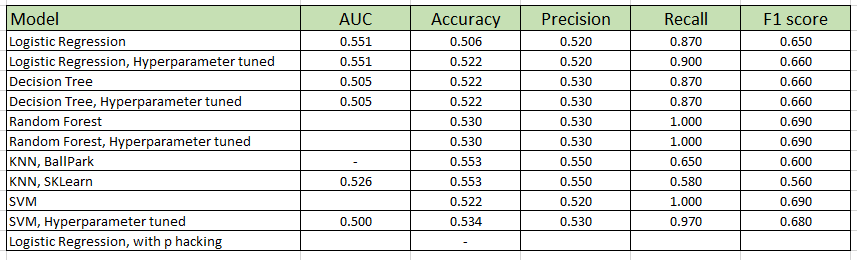

The above summary is extracted from comparing models' predicted results vs true on test data. 


Let's revisit what these classification metrics mean while discussing our results. Descriptions are obtained from developers.google.com:




##### Area Under Curve AUC:
"the probability that the model if given a randomly chosen positive and negative sample, will rank the positive higher than the negative." The perfect model with AUC 1.0 will always correctly predict a randomly chosen positive data higher than a randomly chosen negative data. 



In [86]:
sum(y_df)/len(y_df)

0.5352335708630246

Considering y is up ~53.5 % of the time, by not doing anything, there is 53.5% chance that y is up. 

It seems only the above Logistic Regressions, though only slightly, can surpass that baseline. The other models above are not better than not doing anything according to the AUC metric.

#### Accuracy

"The proportion of all classification that were correct, whether positive or negative"
This metric is normally avoided when data is imbalanced. But since data is roughly balanced, accuracy can be used to gain general pictures on models performance. 

KNN with 16 neighbors perform the best with this metric.

#### Recall

Also called True Positive Rate, it is "the proportion of all actual positives that were correctly classified as positives". Interestingly all the models above generate high values of recall, ranging from 0.58 to 1.00. But this metric is almost useless for trading. 

In trading, instead of the probability of positive prediction given actual positive value as indicated by recall, the reverse is more desirable - the probability of actual positive given positive prediction. In other words, in trading, the precision metric is more important than the recall metric

#### Precision

"The proportion of all the models' positive classifications that are actually positive. "
As mentioned above this metric is more desirable in trading than recall. As shown in the summary table above, KNN with 16 neighbors performs best. 

#### F1 score

"The harmonic mean (a kind of average) of precision and recall" Since this metric is normally used for imbalanced dataset, we could ignore this metric here. 

## Conclusion

For trading, out of the above metrics, precision metric is the most applicable and hence KNN performs the best though only trivially. 

But honestly, considerring very low model performances and the inconclusive result from logistic regression with p hacking as none of the predictors survive being significant at 0.05 level only after 2 iterations of training & trimming, the dataset feels does not offer much room for improvements. 
None of of the current predictors seem to be significantly relevant, though that would be hard to judge ex-ante; hypothetically gold prices are affected by very many things the world has to offer, finding the one significant predictor borders dreaming. 
Hypothetically, there could be many predictors each affect gold price in a small way. 

Or, it could be the opposite. The author began this project guessing that gold moves in the opposite direction than other financial instruments. In theory, at least according to the author's current understanding, this makes sense. When a financial instrument would seemingly generate low returns, people would rather move their money to other instruments; if we cover movements of enough instruments, we have done enough of a fullcourt press on gold. But may be the author is dead wrong on this thinking. 

For improvements, the author would rather go back to the drawing board than fine-tuning current models to reconsider the predictors, add more if necessary, then perhaps consult several domain experts. 

To the author's suprise, investing.com even has a curated list of related instruments that are seemingly historical data of stock prices of gold suppliers & players that can each be downloaded and fed to machined learning models

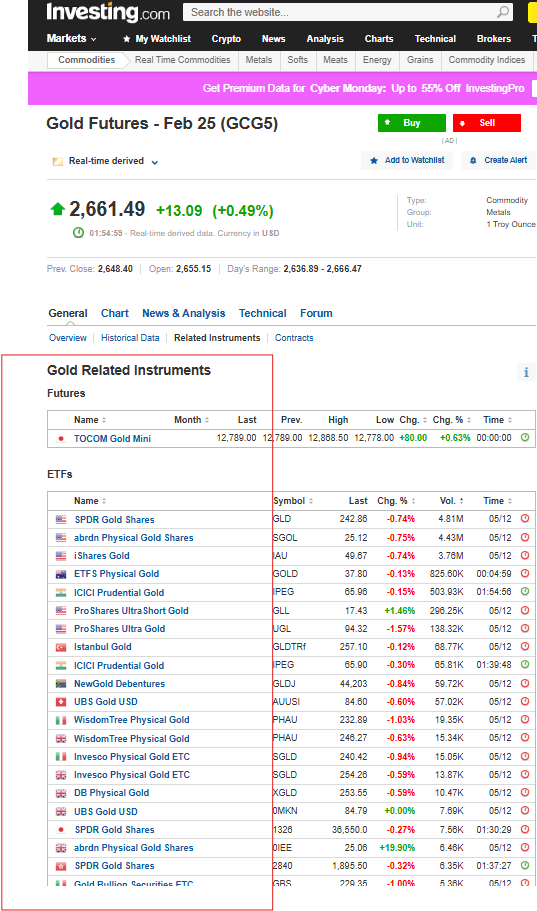

## Sources

Gold futures historical prices - Investing.com. (n.d.). Investing.com. https://www.investing.com/commodities/gold-historical-data

Brent Crude Oil Futures Price Today - Investing.com. (n.d.). Investing.com. https://www.investing.com/commodities/brent-oil

Natural Gas Futures Price Today - Investing.com. (n.d.). Investing.com. https://www.investing.com/commodities/natural-gas

Dow Jones Today | DJIA Index Live - Investing.com. (n.d.). Investing.com. https://www.investing.com/indices/us-30

Nasdaq 100 (NDX) Index - Investing.com. (n.d.). Investing.com. https://www.investing.com/indices/nq-100

S&P 500 Index (SPX) - Investing.com. (n.d.). Investing.com. https://www.investing.com/indices/us-spx-500

Nikkei 225 Index Today (N225) - Investing.com. (n.d.). Investing.com. https://www.investing.com/indices/japan-ni225

EUR USD | Euro US Dollar - Investing.com. (n.d.). Investing.com. https://www.investing.com/currencies/eur-usd

GBP USD | British Pound US Dollar - Investing.com. (n.d.). Investing.com. https://www.investing.com/currencies/gbp-usd

USD JPY | US Dollar to Yen Live Rate - Investing.com. (n.d.). Investing.com. https://www.investing.com/currencies/usd-jpy

2020 United States List of Holidays in PDF, Word, and Excel. (n.d.). General Blue. https://www.generalblue.com/calendar/usa/us-holidays-2020#download_or_print

Citation Generator - QuillBot.com QuillBot.com https://quillbot.com/citation-generator

Bhandari, A. (2024, November 28). What is Multicollinearity? | Causes, Effects and Detection Using VIF. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/

Team, A. (2024, September 4). How to Select Multiple Columns in a DataFrame? Aporia. https://www.aporia.com/resources/how-to/select-multiple-columns-in-dataframe/

A Beginner’s Guide to Collinearity: What it is and How it affects our regression model. (n.d.). StrataScratch. https://www.stratascratch.com/blog/a-beginner-s-guide-to-collinearity-what-it-is-and-how-it-affects-our-regression-model/

Normalization vs Standardization: How to Know the Difference. (n.d.). datacamp.com.
https://www.datacamp.com/tutorial/normalization-vs-standardization

Analytics Vidhya. (2024, November 18). Precision and Recall in Machine Learning - Analytics Vidhya. https://www.analyticsvidhya.com/articles/precision-and-recall-in-machine-learning/

Classification: Accuracy, recall, precision, and related metrics. (n.d.). Google for Developers. https://developers.google.com/machine-learning/crash-course/classification/accuracy-precision-recall

Klasifikasi dengan KNN (K-Nearest Neighbors) menggunakan Python. (n.d.). Medium. Indrianti Ismayani.
https://medium.com/@16611086/klasifikasi-dengan-knn-k-nearest-neighbors-menggunakan-python-bf772e8d4ef5